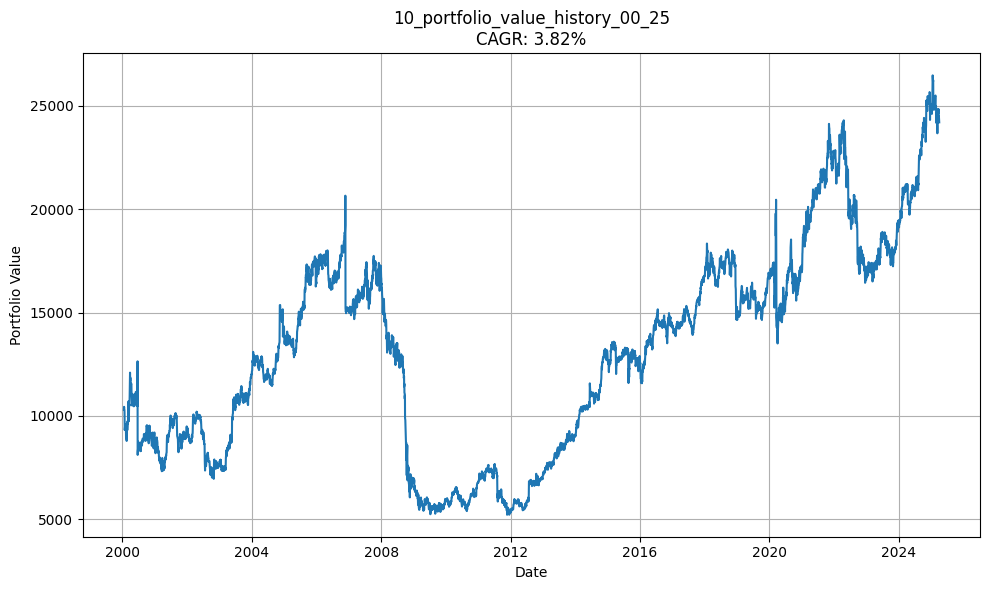

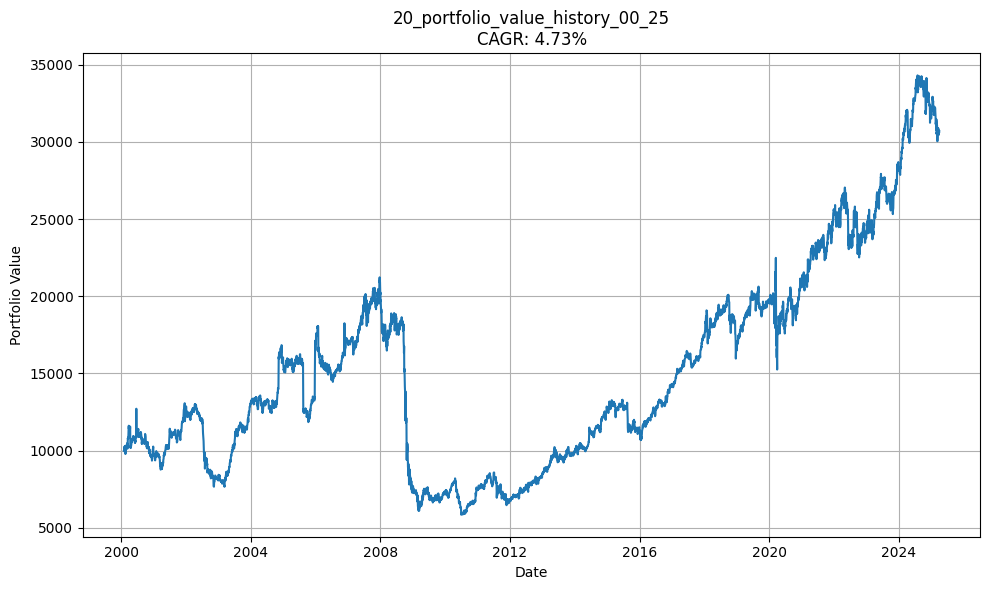

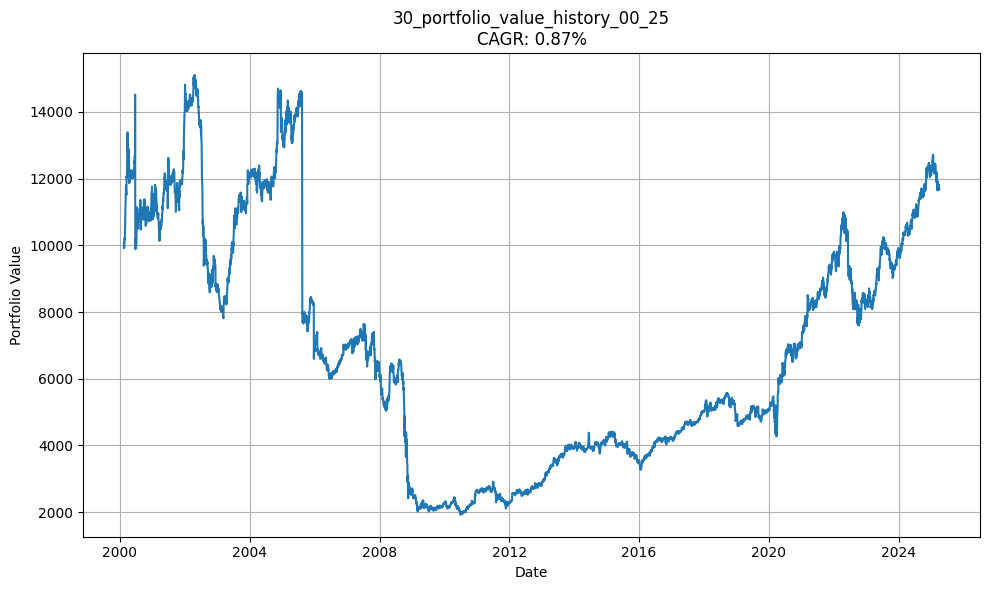

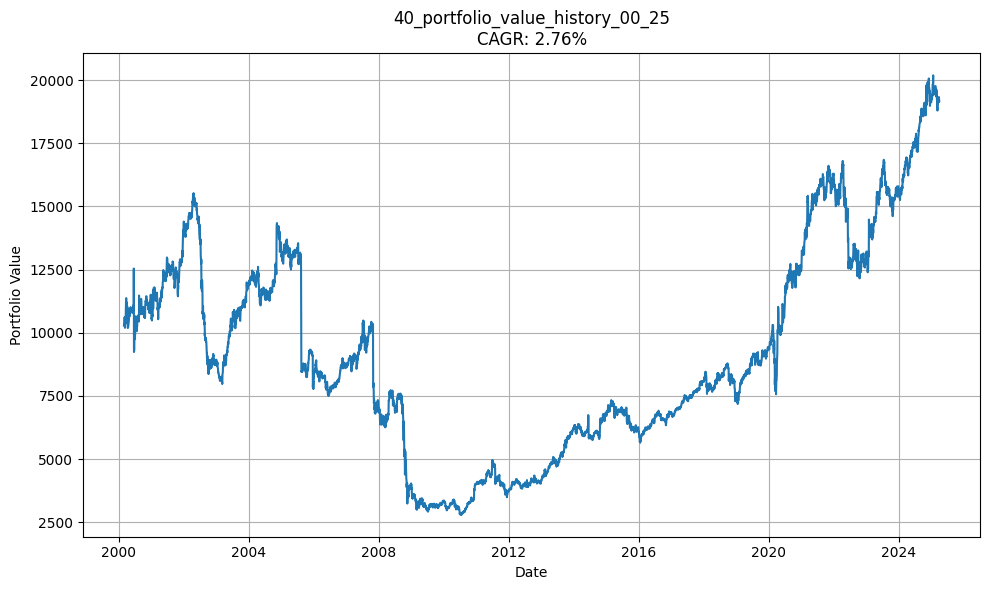

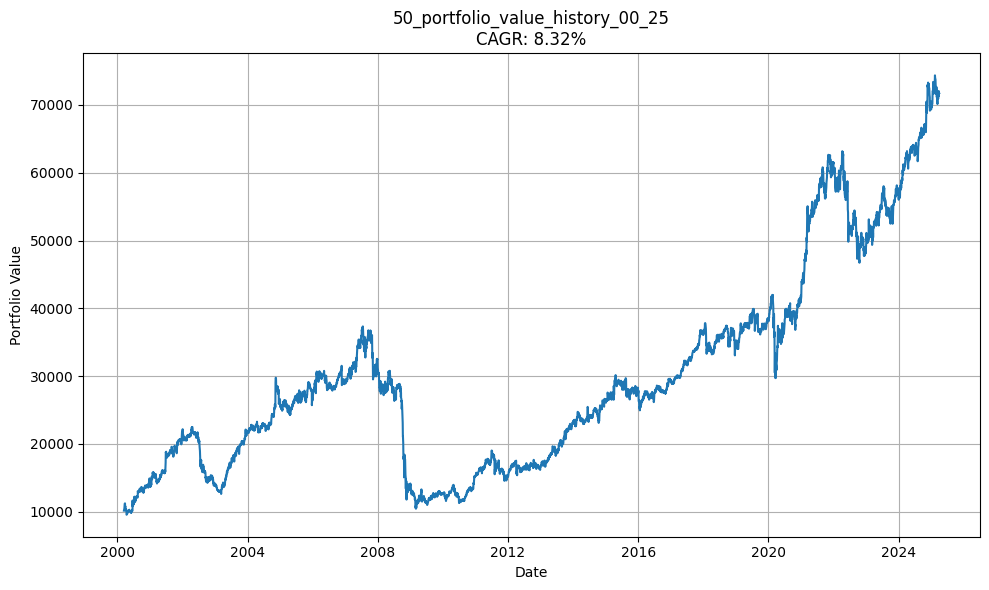

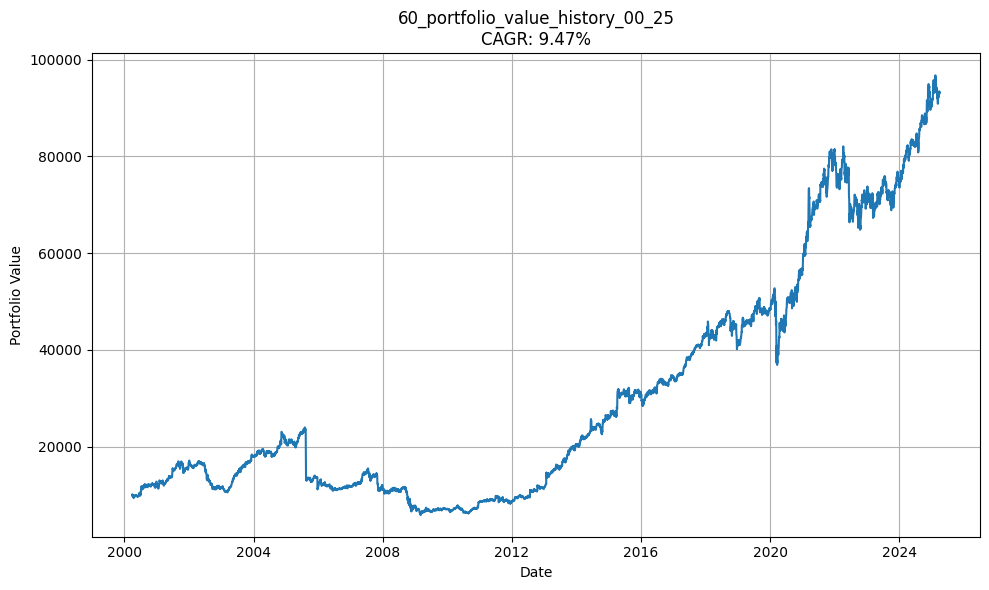

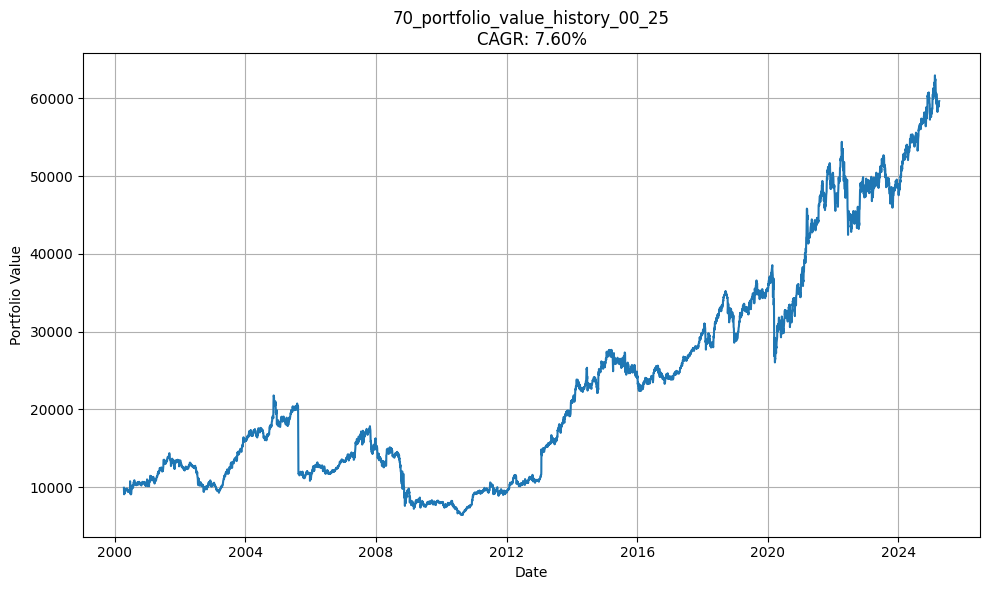

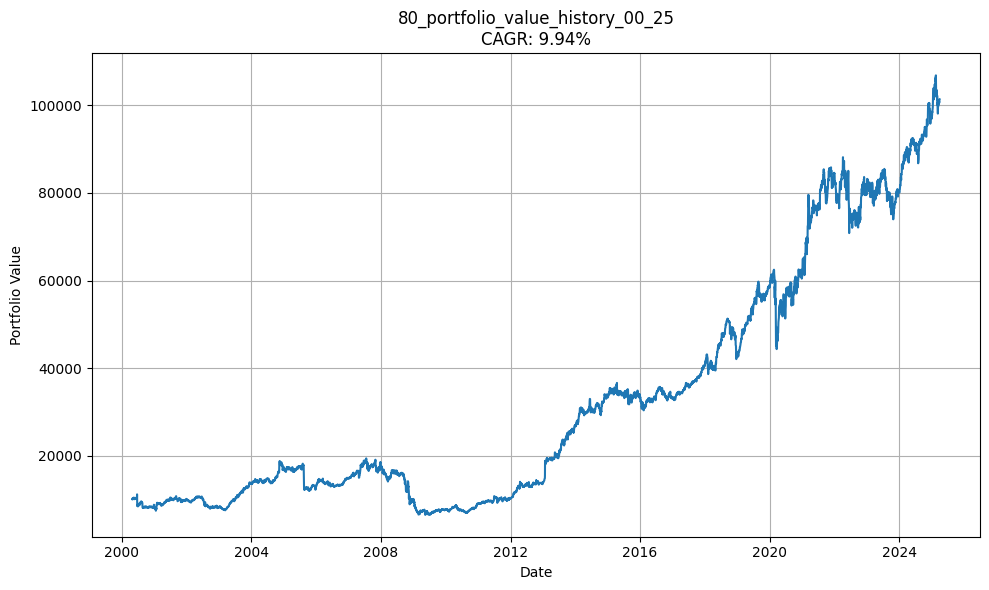

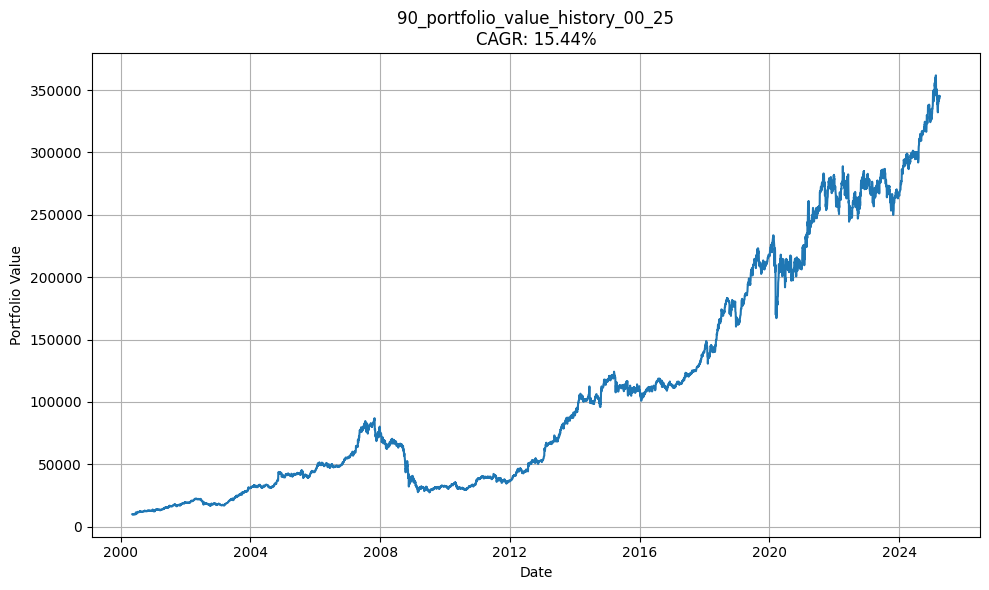

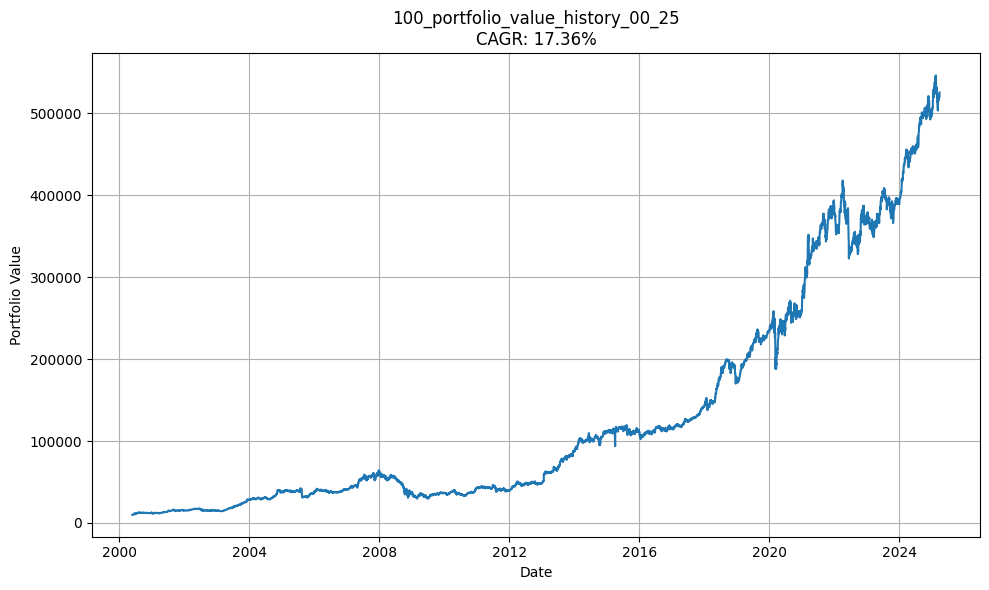

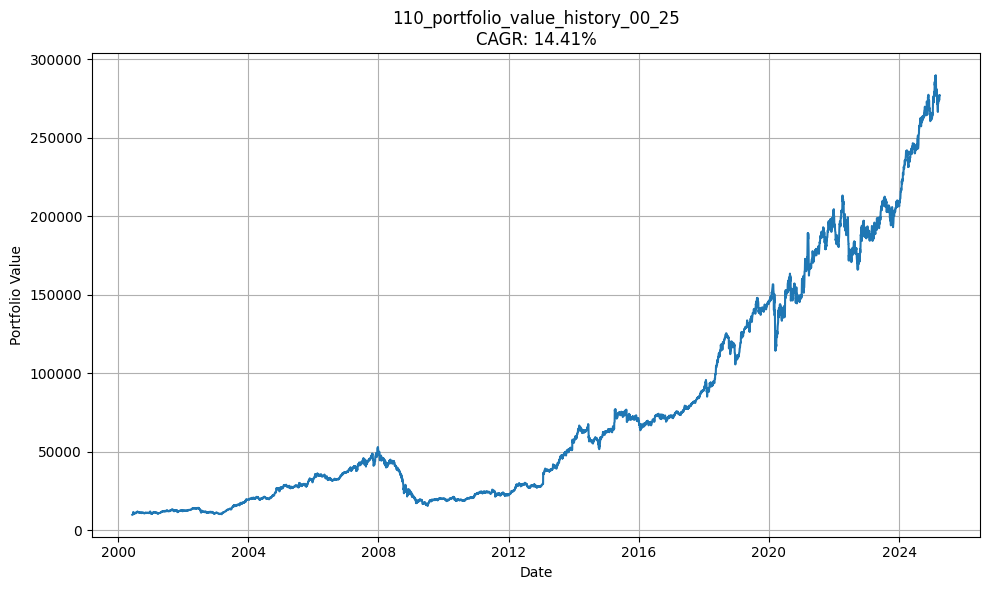

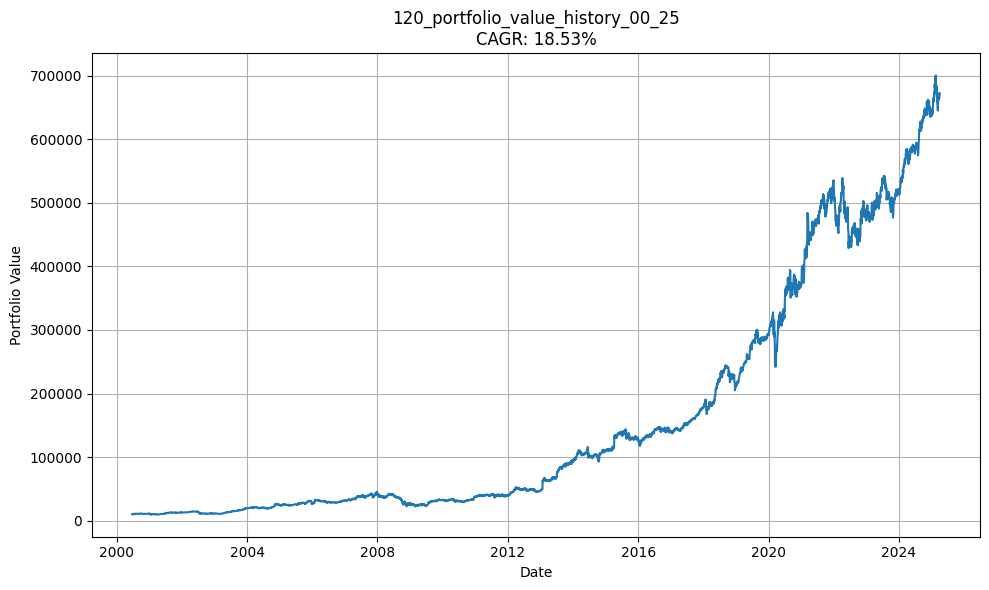

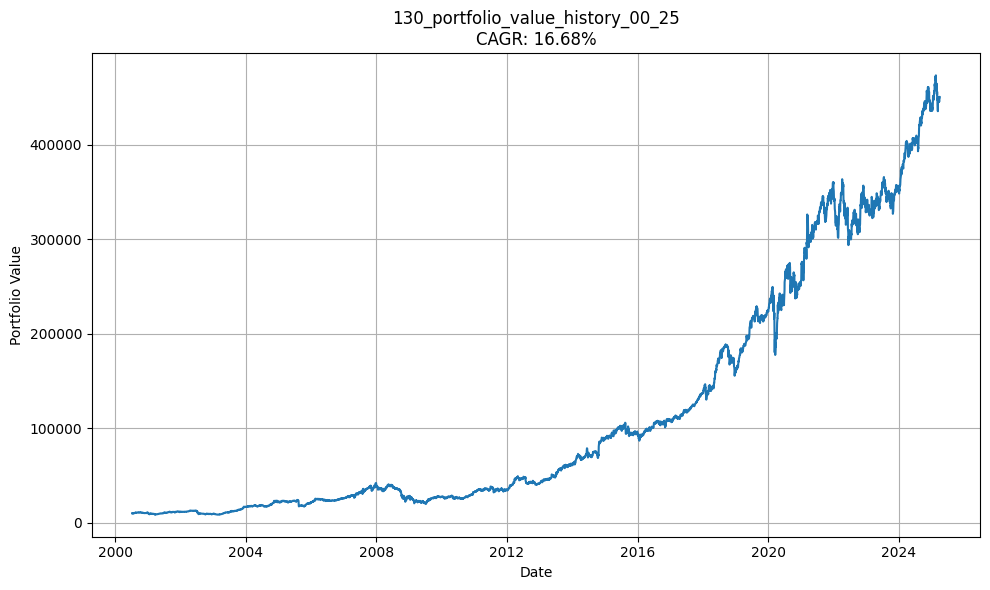

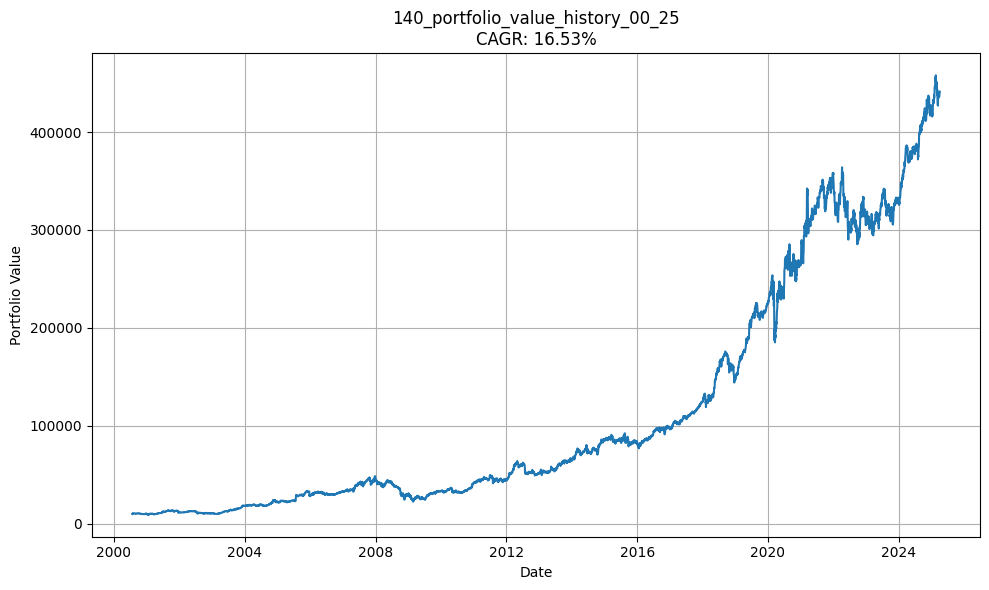

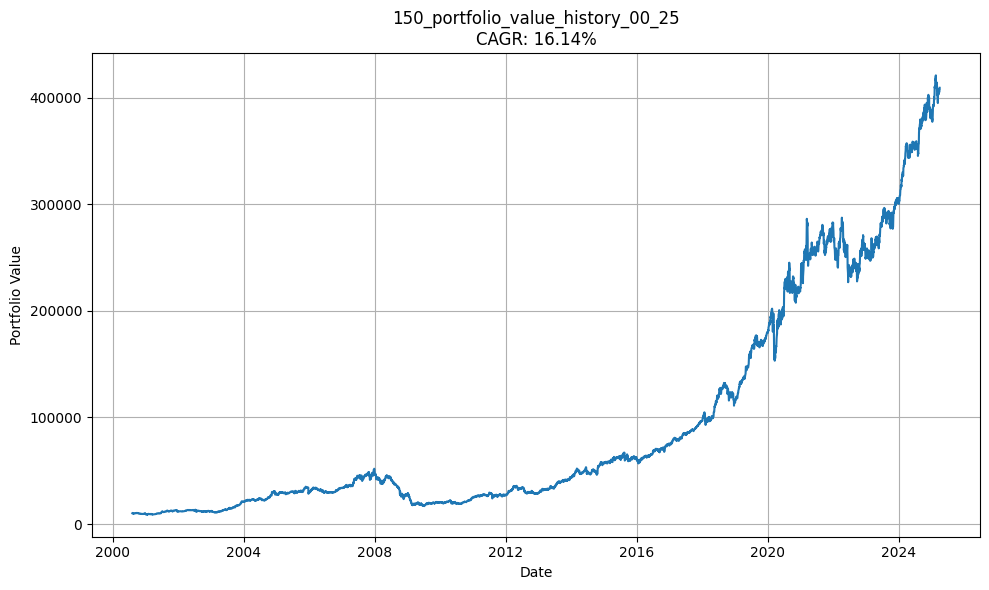

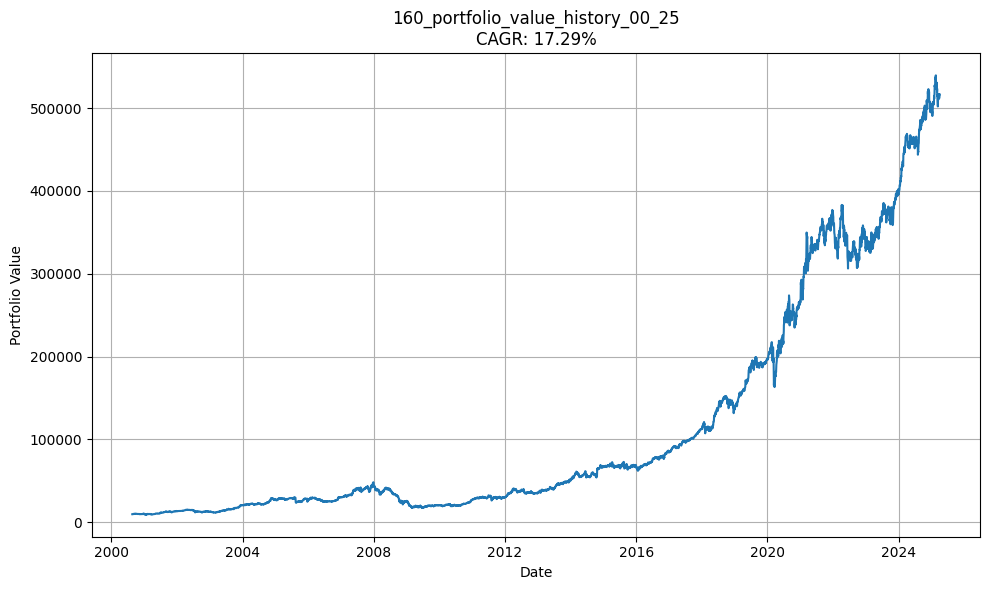

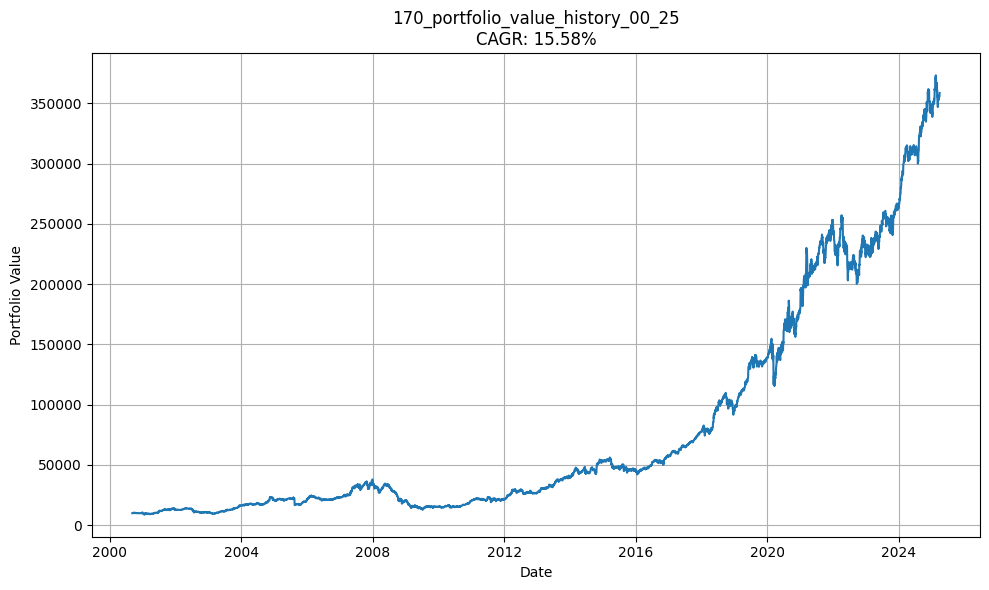

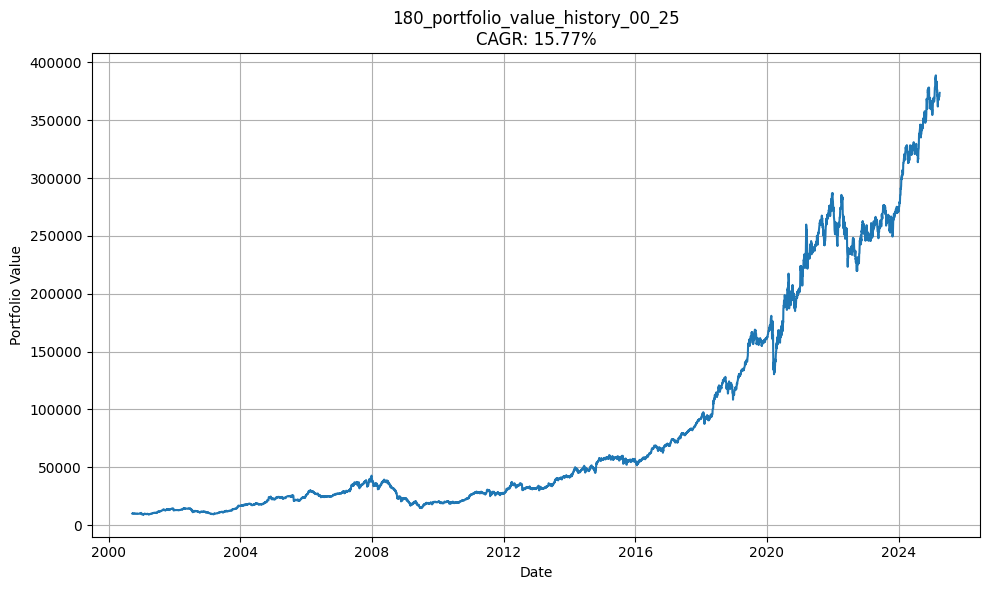

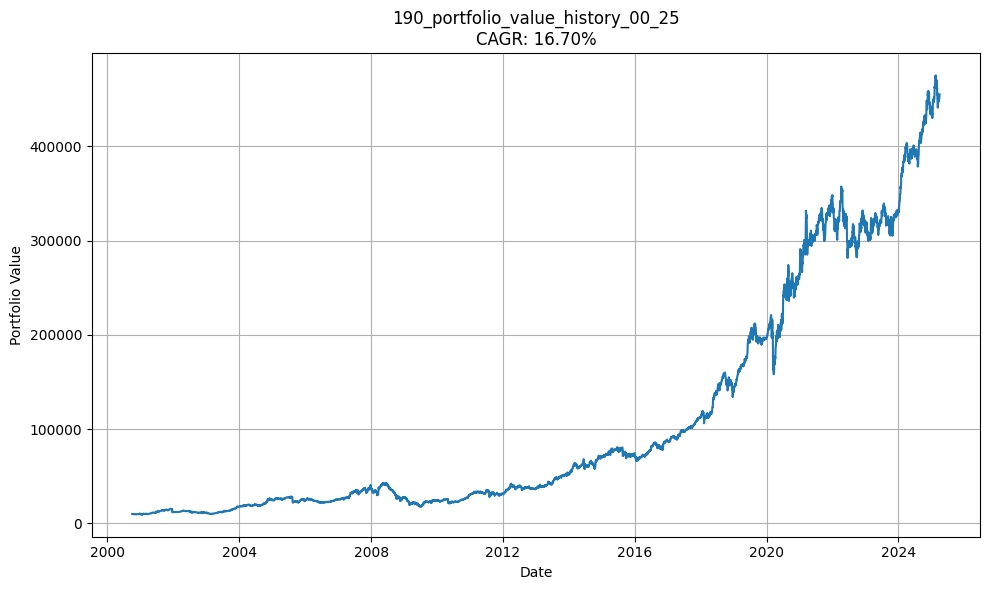

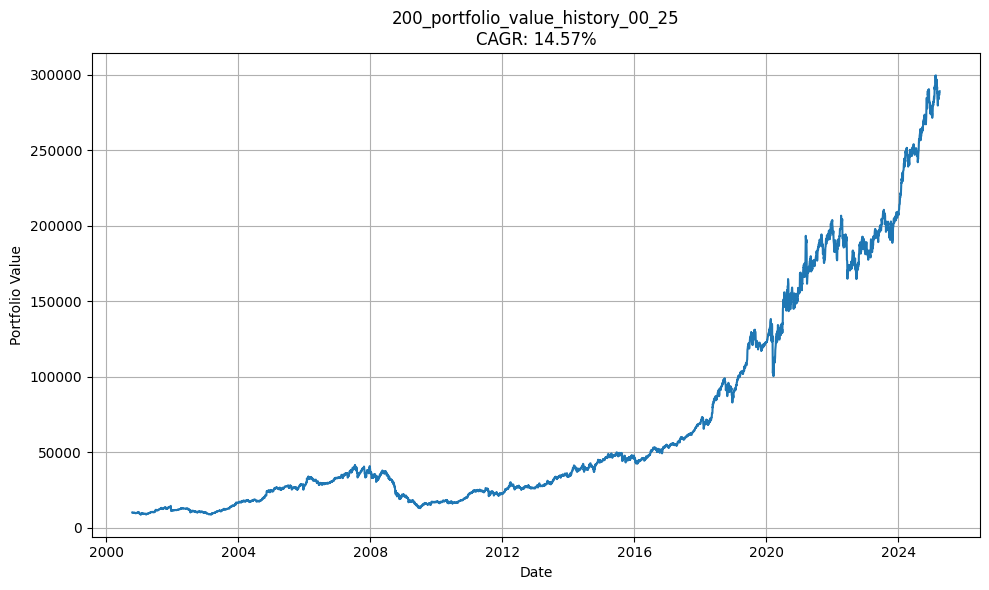

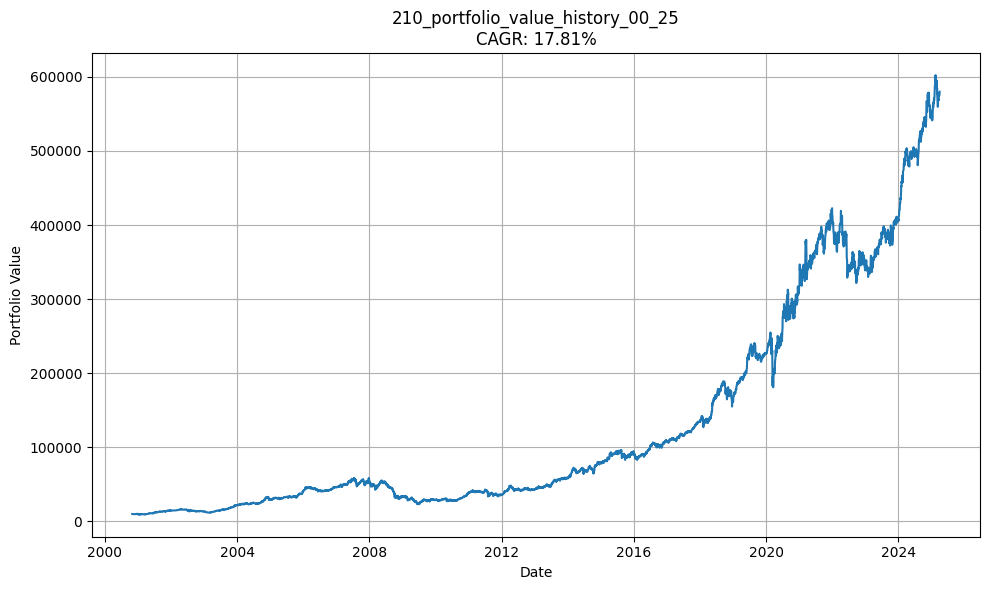

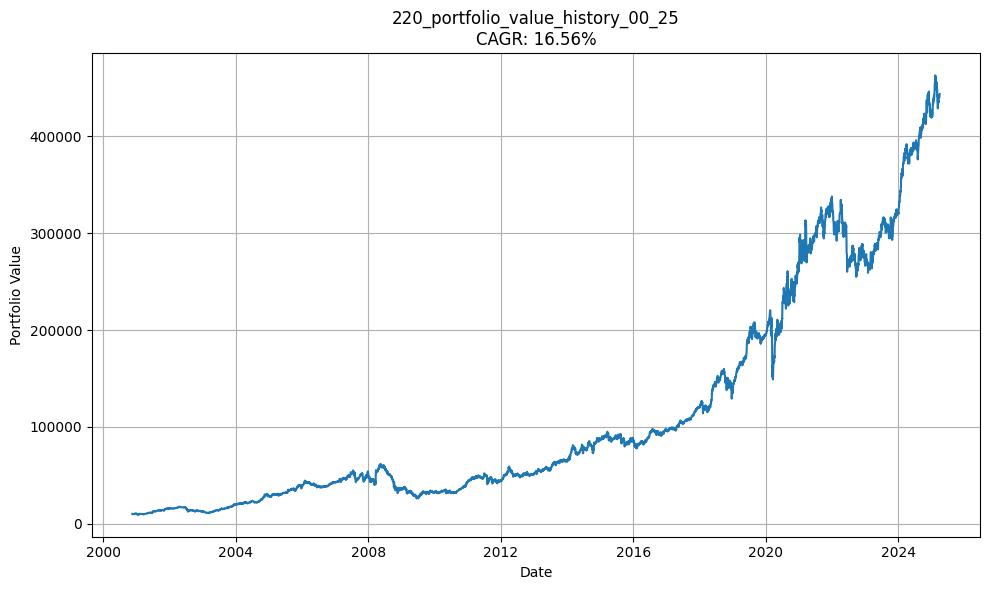

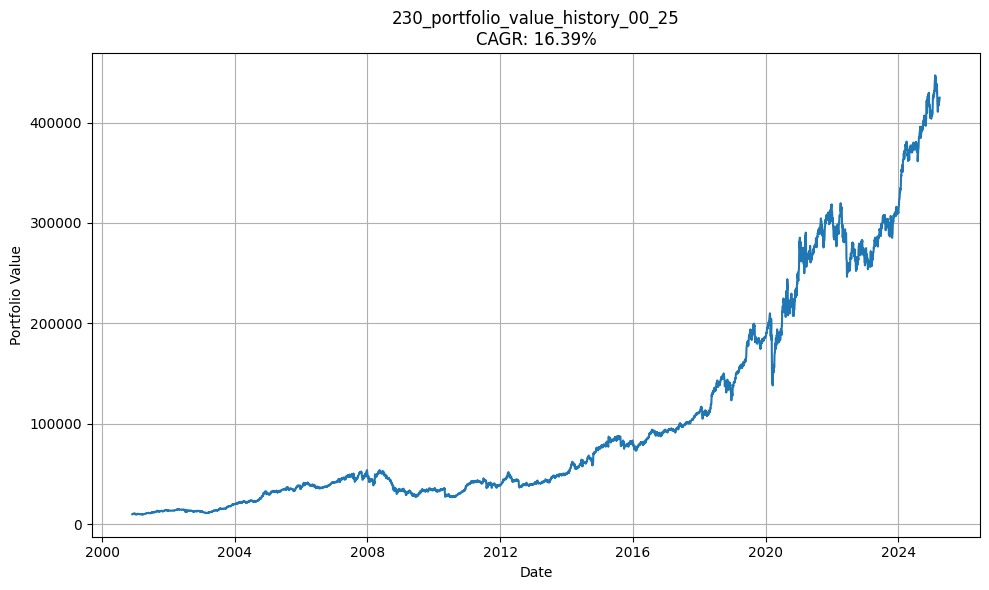

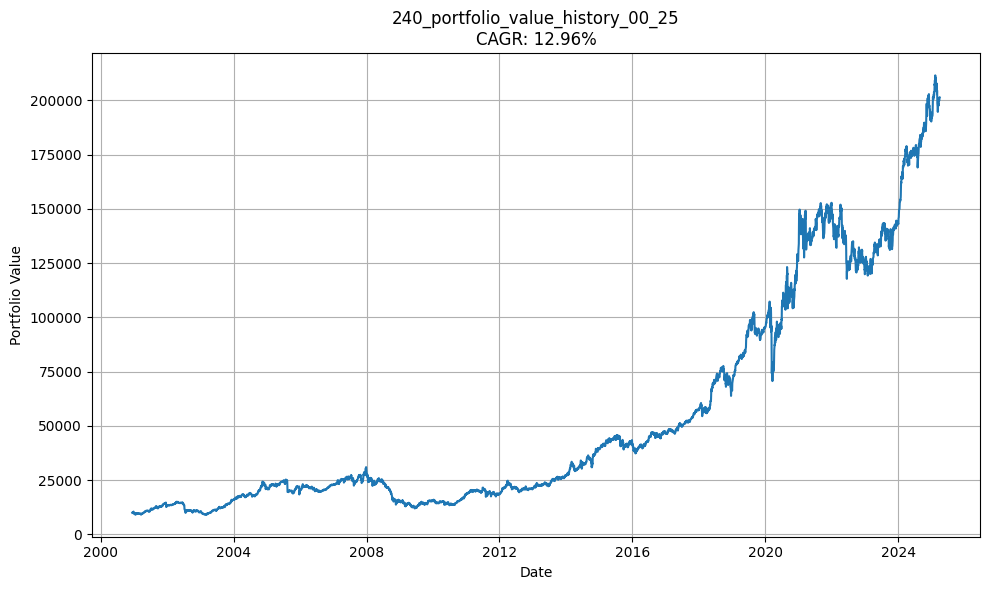

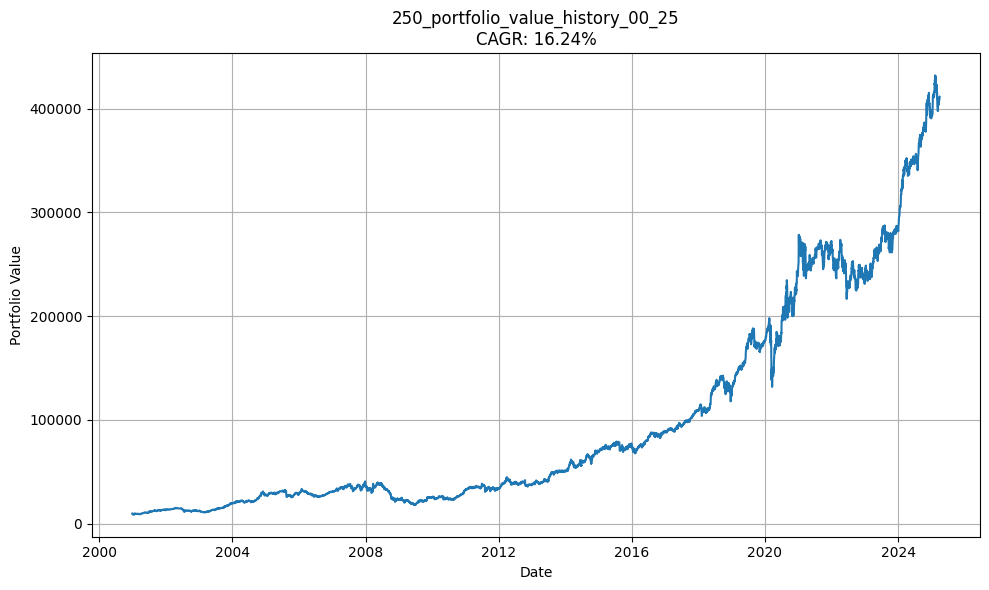

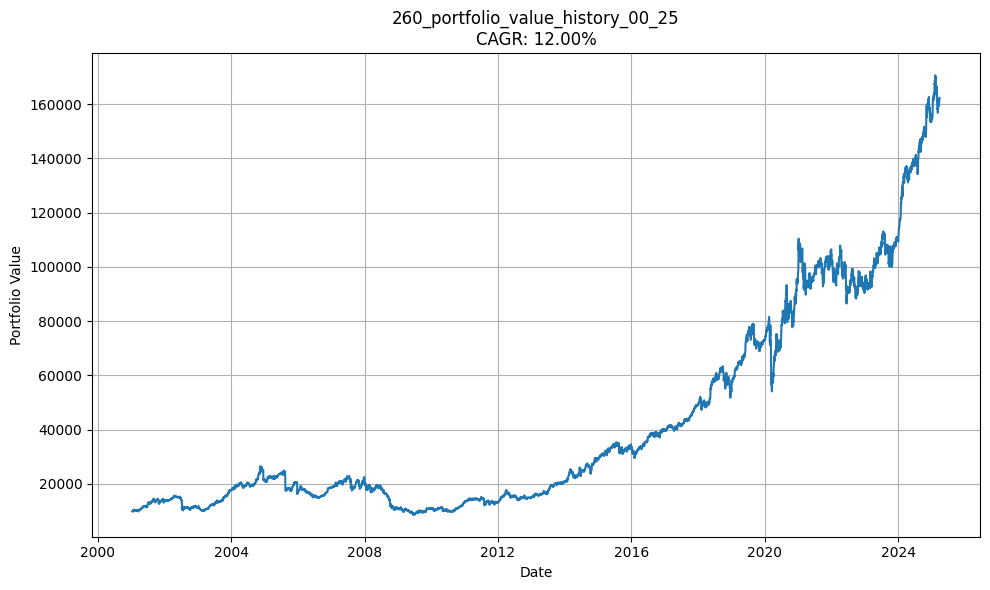

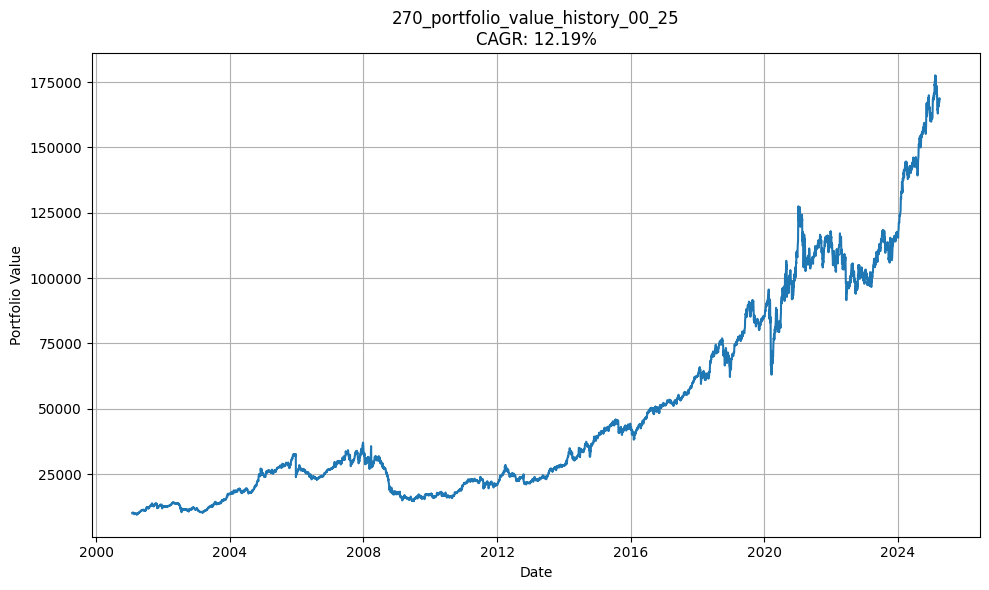

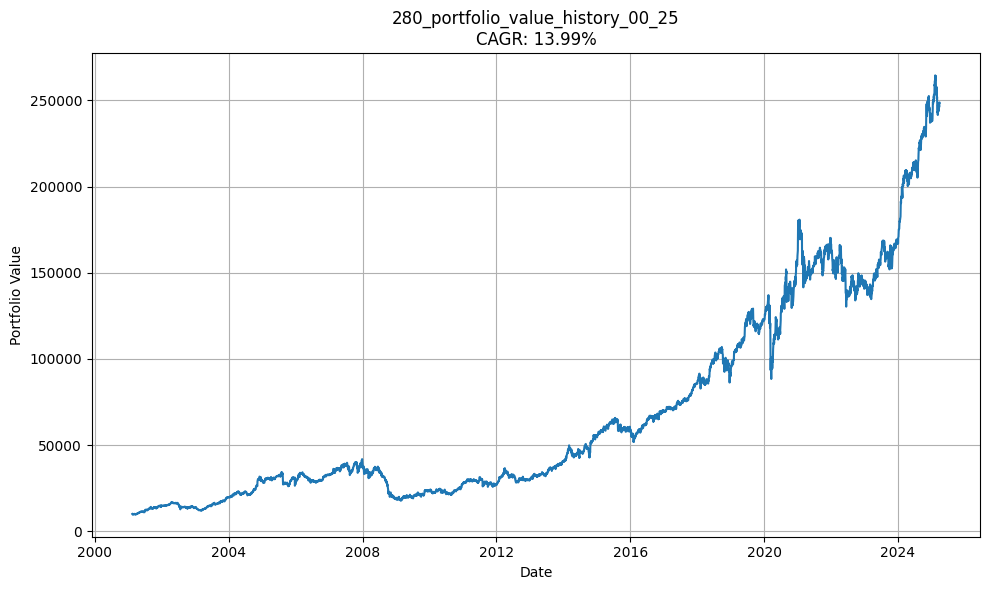

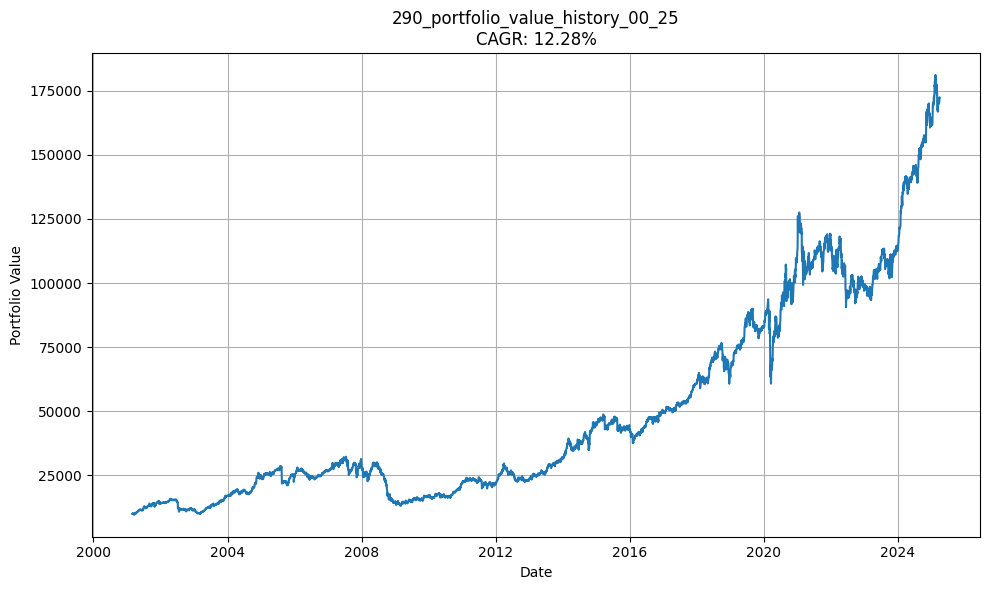

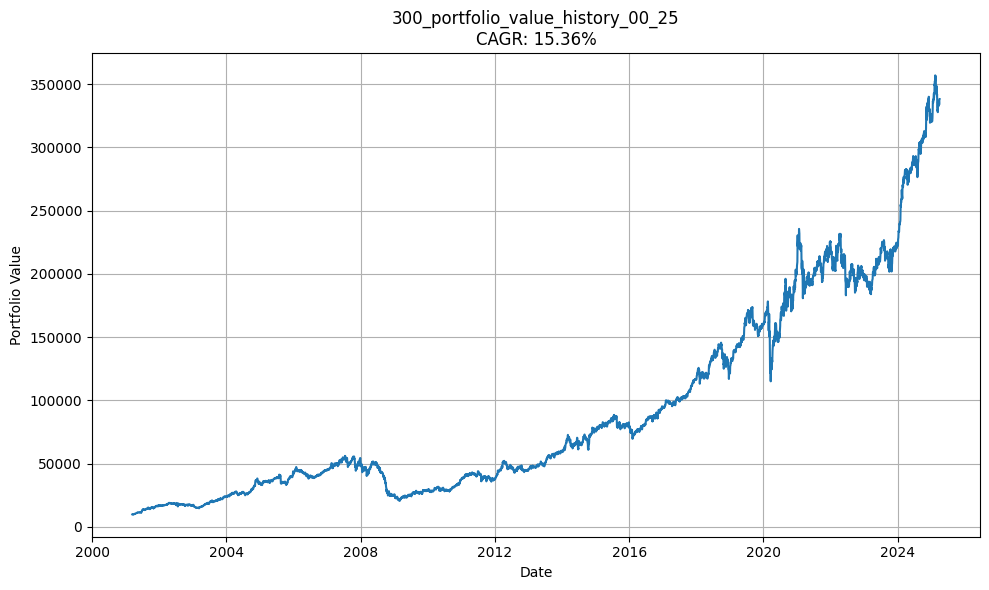

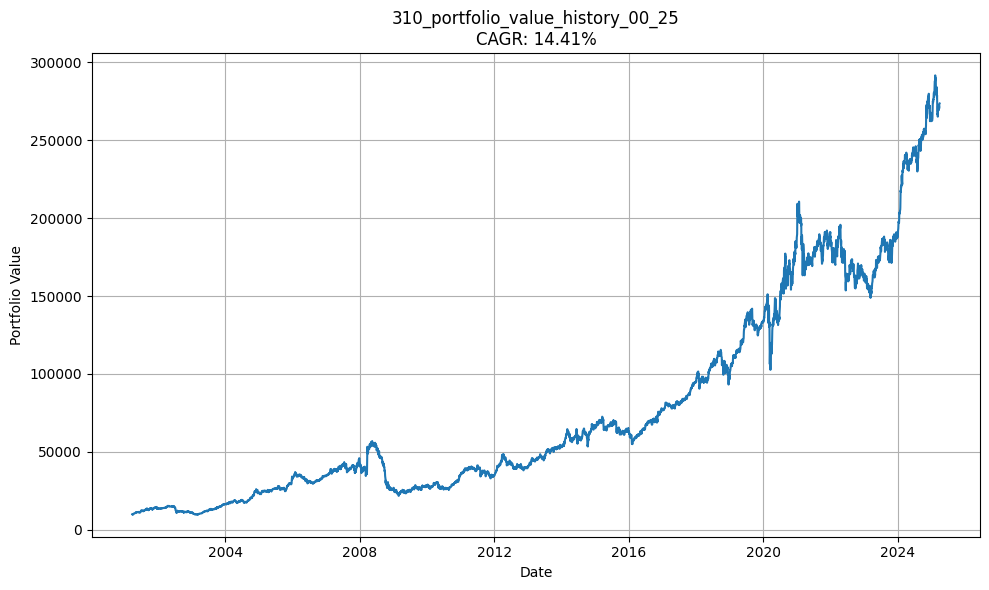

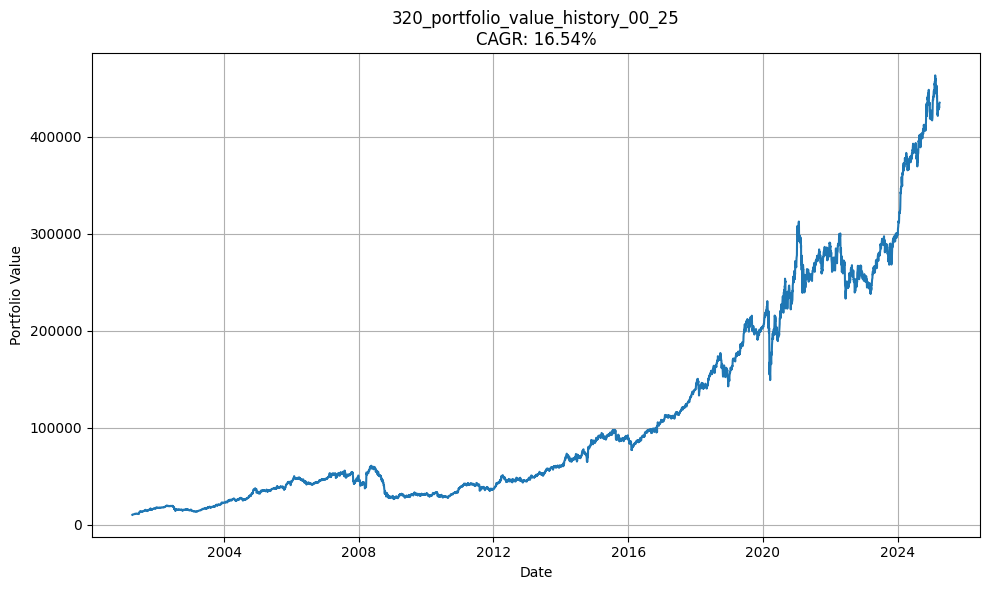

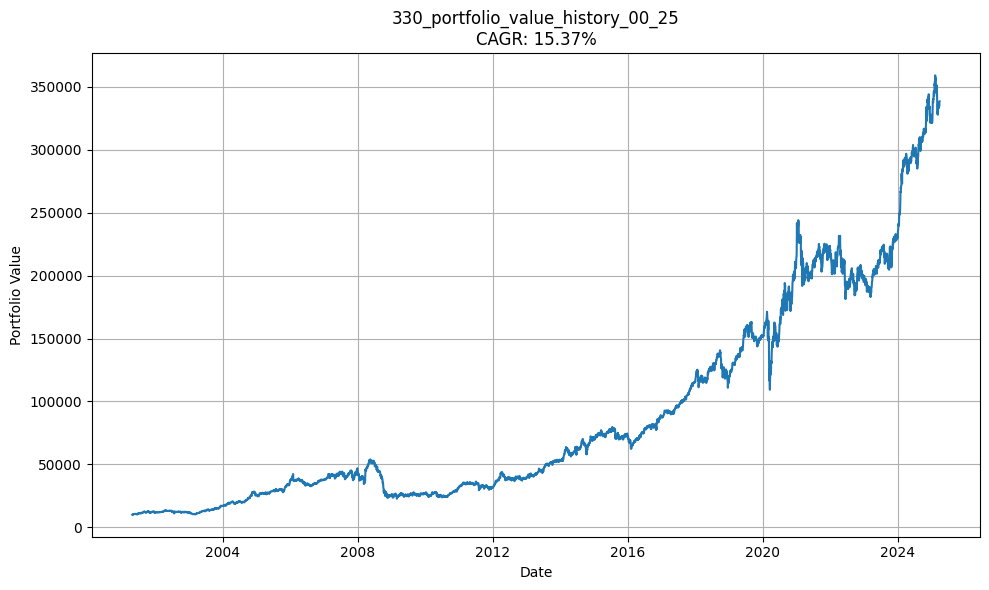

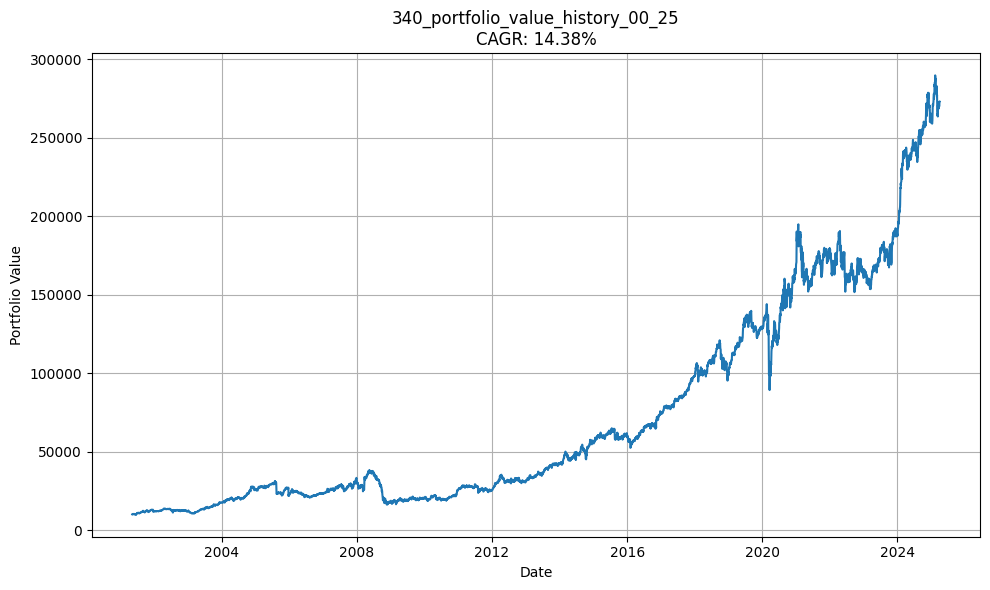

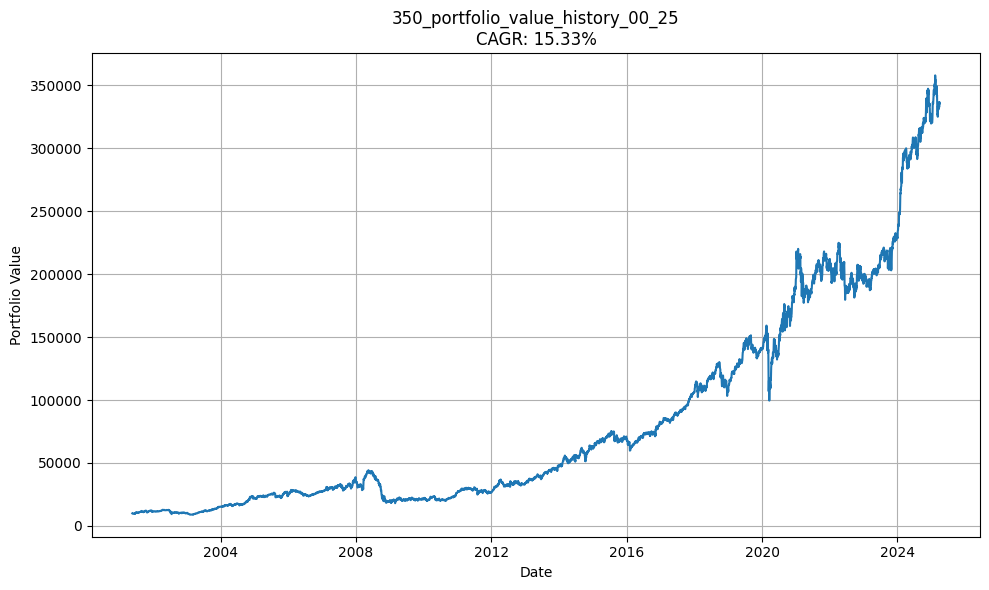

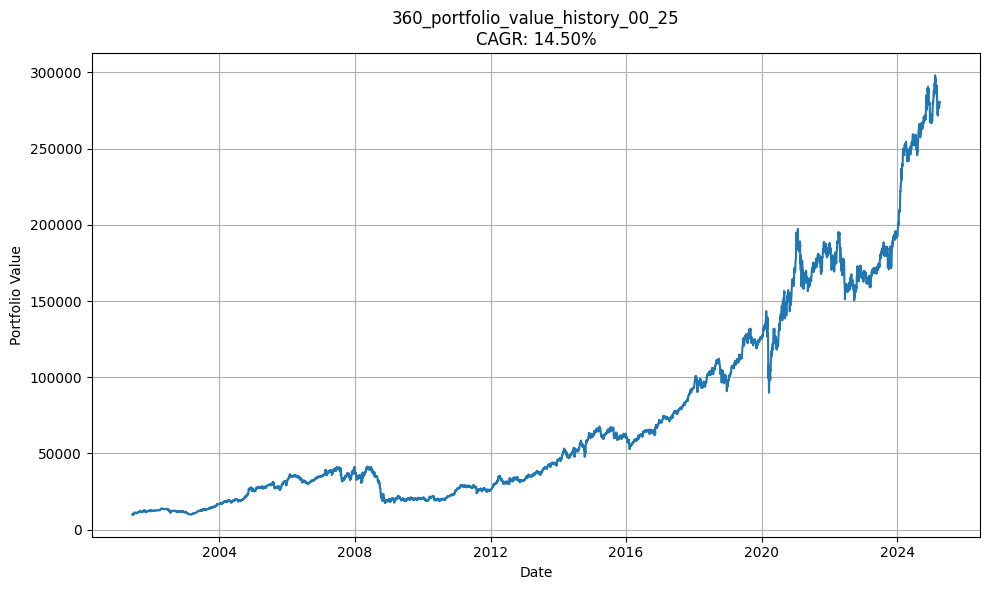

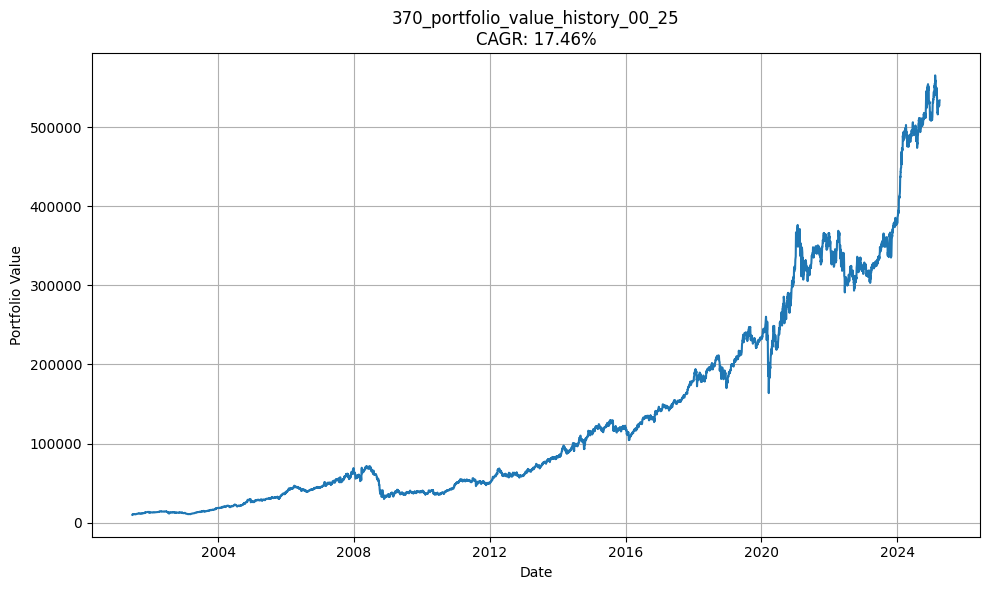

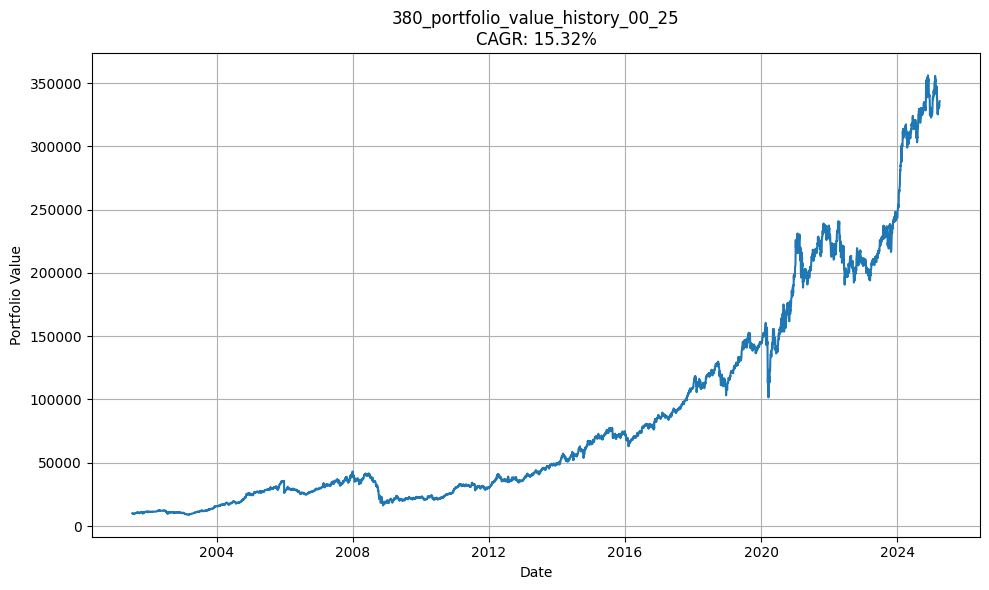

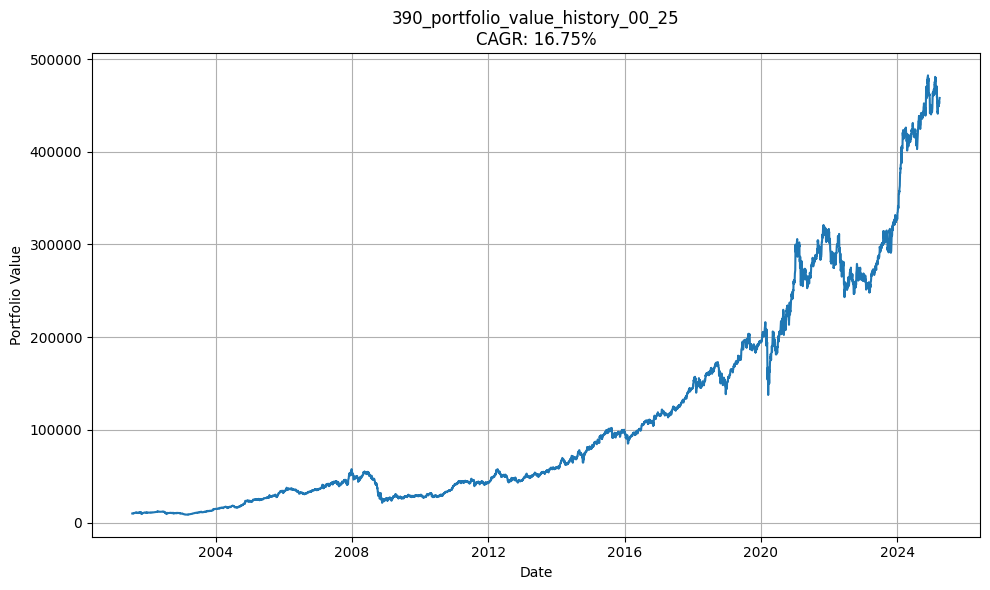

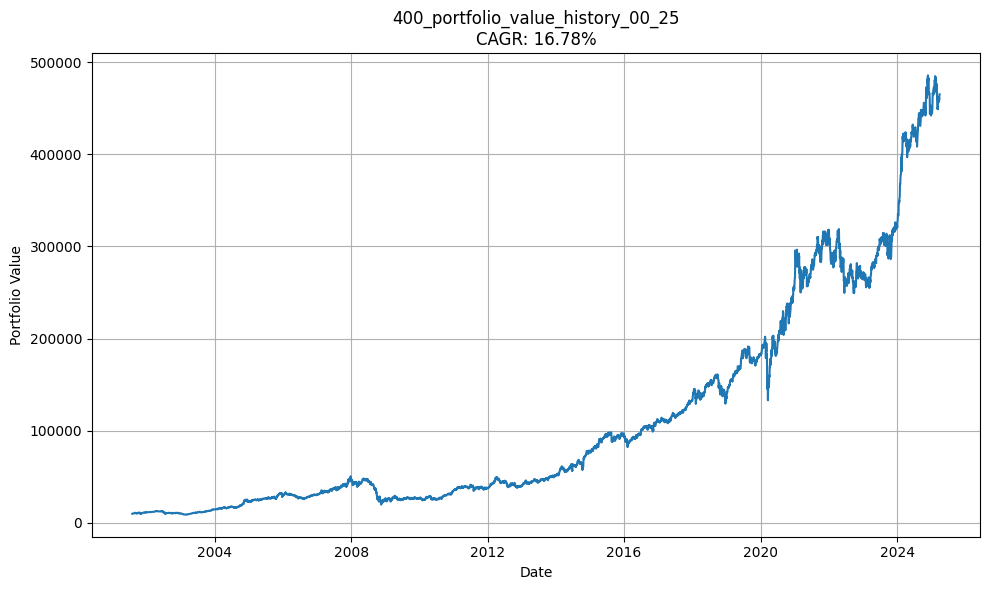

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Display plots inline in the notebook
%matplotlib inline

# Parameters
initial_capital = 10000
years = 25
target_date = "2025-02-18"

# Directory containing the CSV files
directory = "/home/jesse/Projects/CWP_RL/02_MVO_Multi_Assets/MVO_100_Assets_00_25"

# Find and sort files by numeric prefix
files = []
for filename in os.listdir(directory):
    if filename.endswith(".csv") and "portfolio_value_history" in filename:
        match = re.match(r"(\d+)_portfolio_value_history", filename)
        if match:
            num = int(match.group(1))
            files.append((num, filename))

# Sort files numerically
files.sort(key=lambda x: x[0])

# Process each file
for num, filename in files:
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, parse_dates=["Date"])
    df.set_index("Date", inplace=True)

    # Check if target_date exists in the data
    if target_date in df.index:
        final_value = df.loc[target_date, "Portfolio Value"]
        cagr = (final_value / initial_capital) ** (1 / years) - 1
        cagr_text = f"CAGR: {cagr:.2%}"
    else:
        cagr_text = "CAGR: N/A"

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df["Portfolio Value"], label='Portfolio Value')
    plt.title(f"{filename.replace('.csv', '')}\n{cagr_text}")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
